<a href="https://colab.research.google.com/github/torresgt/data_science/blob/master/Analisando%20os%20dados%20do%20Airbnb%20Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science na Prática 2.0**
---

# Análise dos Dados do Airbnb - Lisboa

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa (Portugal), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-12-20/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,79,3,26,2020-01-03,0.34,1,355
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.39,1,363
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,42,3,324,2020-11-01,2.67,1,348
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,36,2,260,2020-12-14,2.49,2,327
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,270


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}".format(df.shape[0]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	 20141
Variáveis: 	 20141


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
* É possível ver que a coluna `reviwes_per_month` e `last_review` tem 17% dos seus valores faltantes.
* As variáveis `name` e `host_name` tem menos de 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.174470
last_review                       0.174470
name                              0.000496
host_name                         0.000050
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Uma forma de identificar a distribuição de variáveis é o histograma.

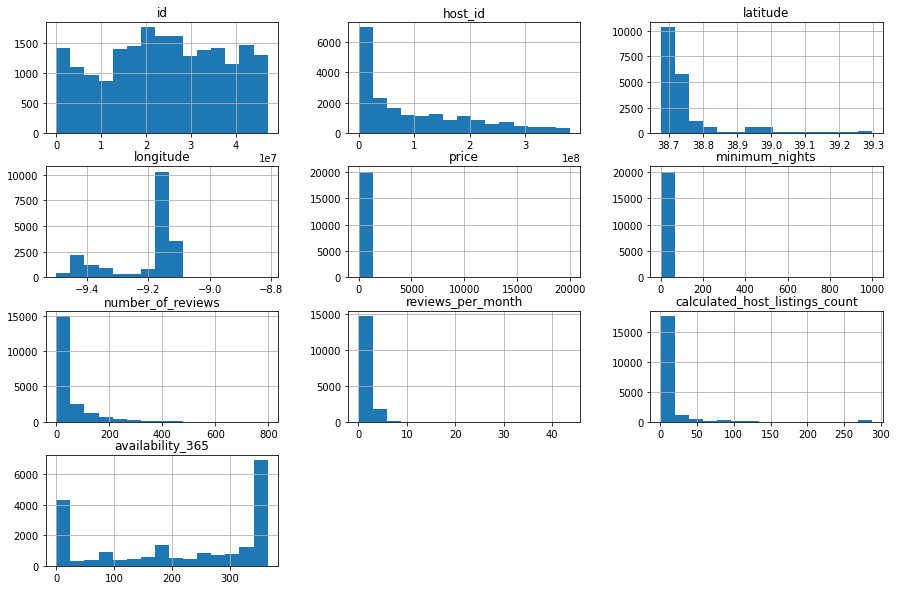

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10));

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'last_review','reviews_per_month', 
   'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,20141.000000,20141.000000,16627.000000,20141.000000,20141.000000
mean,103.149695,3.703689,1.227901,13.577826,214.359913
std,332.983121,18.163081,1.328587,37.528400,143.068871
min,0.000000,1.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,0.260000,1.000000,76.000000
50%,66.000000,2.000000,0.780000,3.000000,262.000000
75%,100.000000,3.000000,1.830000,10.000000,356.000000
max,19988.000000,1000.000000,43.640000,288.000000,365.000000


A partir do resumo estatístico acima, podemos podemos supor:
* A variável `price` possui 75% do valor em 100, porém seu valor máximo é de 19988.
* A quantidade mínima de noites ultrpassa 365 dias no ano.

<function matplotlib.pyplot.show>

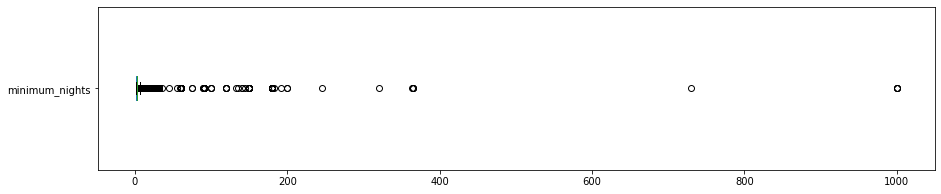

In [11]:
# minimum_nights
df.minimum_nights.plot(kind ="box", vert=False, figsize=(15,3))
plt.show

### **Q4. Qual a média dos preços de aluguel?**

In [18]:
# ver a média da coluna `price``
df.price.mean()

103.14969465269847

### **Q4. Qual a correlação existente entre as variáveis**

Correlação é a existencia de uma relação entre duas coisas. Nessa análise, busco relação ou semelhança entre duas variáveis.

Para identificar as correlações existentes entre as variáveis irei criar uma matriz de correlação e gerar um *heatmap*

In [14]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'last_review','reviews_per_month', 
   'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.006308,-0.044025,-0.004328,-0.010778
minimum_nights,-0.006308,1.000000,-0.013746,-0.019609,-0.017803
reviews_per_month,-0.044025,-0.013746,1.000000,-0.091207,-0.020931
calculated_host_listings_count,-0.004328,-0.019609,-0.091207,1.000000,0.044431
availability_365,-0.010778,-0.017803,-0.020931,0.044431,1.000000


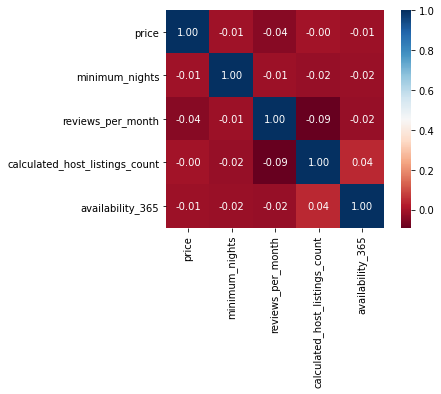

In [15]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = "RdBu", fmt= '.2f', square= True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Agora checarei os tipos de locações pela coluna `room_type` e a seguir contar a quantidade de ocorrências de cada tipo de aluguel utilizando `values_counts()`.

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    14997
Private room        4376
Hotel room           421
Shared room          347
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.744601
Private room       0.217268
Hotel room         0.020903
Shared room        0.017229
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Lisboa?**

Para se verificar uma variável em função de outra é utilizando o `groupby()`. No caso, irei comparar os bairros (*neighbourhoods*) a partir do preço de llocação.


In [19]:
# ver preços por bairros, na média
df.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)

neighbourhood
Azambuja                                 317.500000
Freiria                                  290.000000
Cardosas                                 280.000000
Ota                                      249.000000
Vermelha                                 242.500000
                                            ...    
Casal de Cambra                           38.285714
Campelos e Outeiro da Cabea               37.000000
Mina de gua                               34.727273
Painho e Figueiros                        33.500000
Pvoa de Santo Adrio e Olival de Basto     31.750000
Name: price, Length: 128, dtype: float64

Acima, vemos que o bairro com maior média de preço é Azambuja. Porém para quem não tem familiaridade com os bairros lusitanos farei uma verificação no bairro com maior média de preços para verificar se não há algo de estranho.

In [21]:
# ver quantidade de imóveis no Azambuja
print(df[df.neighbourhood == 'Azambuja'].shape)

#ver as 2 entradas de Azambuja
df[df.neighbourhood == 'Azambuja']

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3260,8399727,Casa do Alfaro,44253397,Rodrigo,Azambuja,Azambuja,39.09760,-8.90530,Entire home/apt,600,3,3,2017-10-07,0.06,1,269
16360,38071293,Casa da Rainha - Azambuja,288897396,Inês,Azambuja,Azambuja,39.06735,-8.86967,Private room,35,1,0,NaN,NaN,1,179


In [29]:
# ver a média da coluna `minimum_nights`
df['minimum_nights'].mean()

3.703688992602155

Como a Latitude e a Longitude dos imóveis são disponibilizadas, é possível plotar cada ponto.

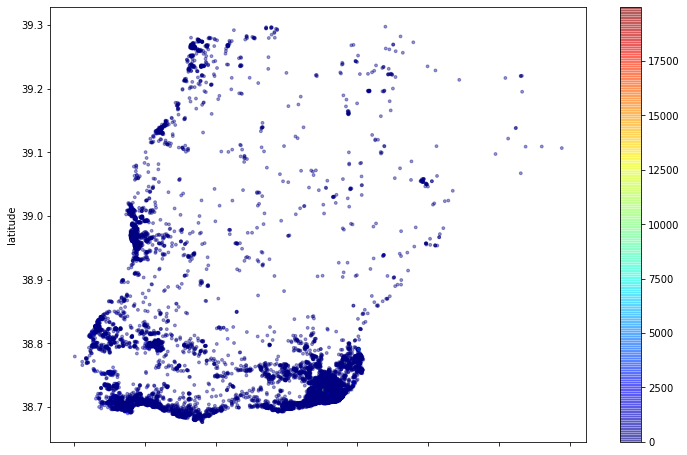

In [27]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df.price, s=8,
        cmap=plt.get_cmap('jet'), figsize=(12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

## Conclusões


Foi feita apenas uma análise superficial na base de dados da Airbnb e essa em questão não foi encontrado nenhum erro ou *Outliers* nas variáveis.

Nota-se também que, mesmo os bairros com a maior média de preços não há garantia em um grande número de imóveis, como é o caso de 'Azambuja' que só havia 2. Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.
 
